In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

Imported function `get_value_data(files, columns)` -> dataframe of values
Imported function `get_value_data(files, columns)` -> dataframe of returns
Imported function `initialize_data()` -> tuple of value and returns data
Imported PairTradingTest
0.18187173709993393
0.3538758656001613
0.004085227224692463
0.6083708071041048
0.4966055703670485
0.43918531549258083
0.37889792645732717
0.08313195873856188
0.23526149661460916
0.15089704749024102
0.13538734816825204
0.1007094351108937
0.3877013412891899
0.7081701441335445
0.6048595730629904
0.5417681241161835
0.37871872762255654
0.33674903263165556
0.33899525054154556
0.3843054369809631
0.27921168518467243
0.17083602580130303
0.0714477537245617
0.24330901451323822
0.20357821136584558
0.24532463655749542
0.23013869587643565
0.2510816917700768
0.1747447347611914
0.24201383675303784
0.0685906123656545
0.04470521403886378
0.05227159425391207
0.1338961326011754
0.09916448608948242
0.004431745372417466
0.7935044682250876
0.979902065664578
0.993165

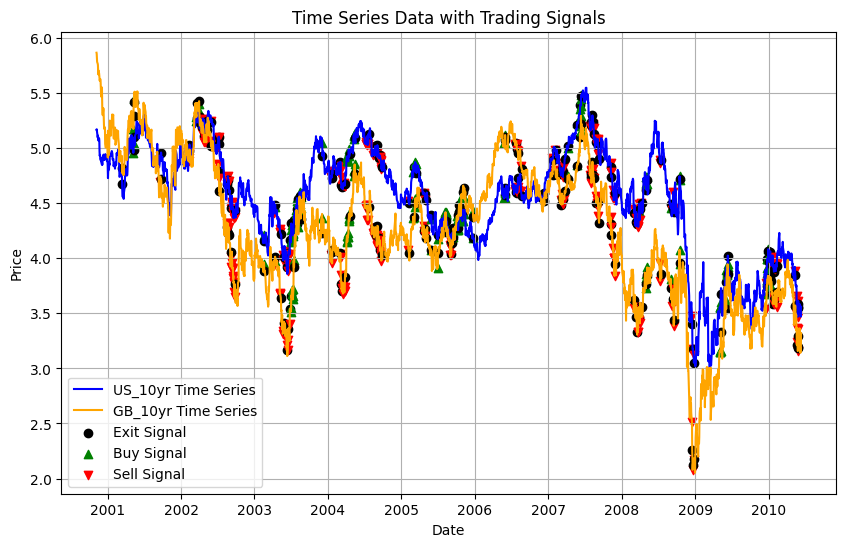

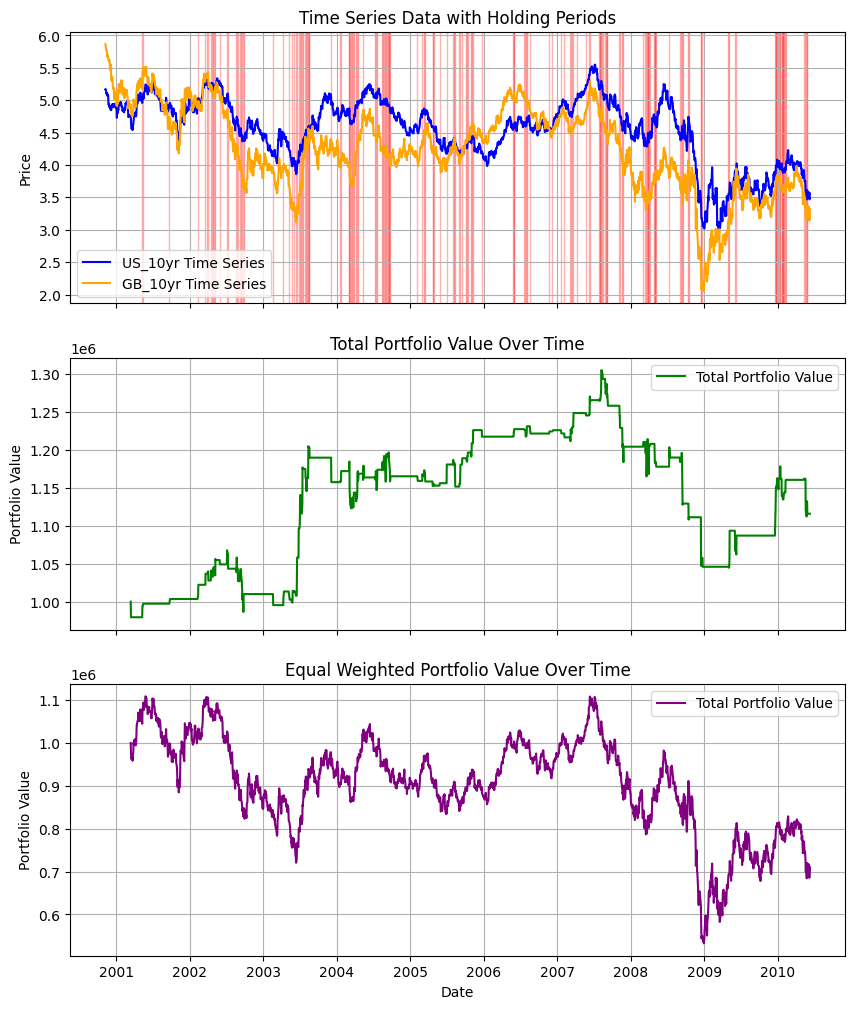

            US_10yr_Position  GB_10yr_Position  Cash_Position
Date                                                         
2001-03-13     483350.268119     516649.731881   0.000000e+00
2001-03-14          0.000000          0.000000   9.794695e+05
2001-03-15          0.000000          0.000000   9.794695e+05
2001-03-16          0.000000          0.000000   9.794695e+05
2001-03-19          0.000000          0.000000   9.794695e+05
2001-03-20          0.000000          0.000000   9.794695e+05
2001-03-21          0.000000          0.000000   9.794695e+05
2001-03-22          0.000000          0.000000   9.794695e+05
2001-03-23          0.000000          0.000000   9.794695e+05
2001-03-26          0.000000          0.000000   9.794695e+05
2001-03-27          0.000000          0.000000   9.794695e+05
2001-03-28          0.000000          0.000000   9.794695e+05
2001-03-29          0.000000          0.000000   9.794695e+05
2001-03-30          0.000000          0.000000   9.794695e+05
2001-04-

In [2]:
%run data.py

In [3]:
# finding the sharpe ratio
portfolio_returns = strategy.portfolio.sum(axis=1).diff()
print(portfolio_returns)
daily_risk_free_rate = .05/250 # assuming 250 trading days in a year
excess_returns = portfolio_returns - daily_risk_free_rate
mean = np.mean(excess_returns)
std_dev = np.std(excess_returns)

# Calculate the Sharpe Ratio
sharpe_ratio = mean / std_dev
annualized_sharpe_ratio = sharpe_ratio * 250**(1/2)
print(sharpe_ratio)
print()

NameError: name 'strategy' is not defined

In [4]:
# equal weighted portfolio sharpe
eq_portfolio_returns = strategy.ew_portfolio.sum(axis=1).diff()
ew_excess_returns = eq_portfolio_returns - daily_risk_free_rate
ew_mean = np.mean(ew_excess_returns)
ew_std_dev = np.std(ew_excess_returns)

ew_sharpe_ratio = ew_mean/ew_std_dev
ew_annualized_sharpe_ratio = ew_sharpe_ratio * 250**(1/2)
print(ew_sharpe_ratio)
print(ew_annualized_sharpe_ratio)

NameError: name 'strategy' is not defined

In [5]:
# correlation between our portfolio returns and equal weighted portfolio returns
eq_portfolio_returns.corr(portfolio_returns)

NameError: name 'eq_portfolio_returns' is not defined

In [6]:
series = {"US_10yr_2000.csv": "US_10yr", "GB_10yr_2000.csv": "GB_10yr"}
data = initialize_data(**series)
coint(data.data.iloc[:,0],data.data.iloc[:,1])

(-2.9934243705489187,
 0.11177679950857483,
 array([-3.89827144, -3.33715143, -3.04515895]))

0.6083708071041048


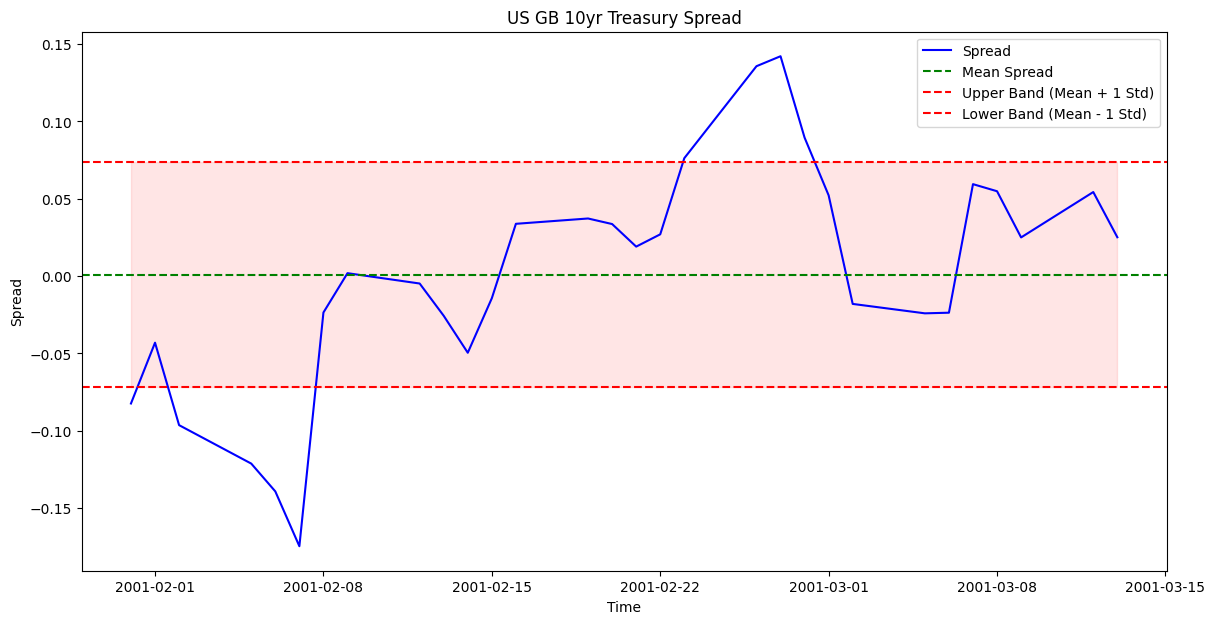

In [7]:
# graph the spread between the two series over a some timeframe

past_data = data.data.iloc[60:90]
coint(past_data.iloc[:,0],past_data.iloc[:,1])
_, beta_vals = find_coint(past_data.iloc[:,0],past_data.iloc[:,1])
spread = past_data.iloc[:, 0] - beta_vals[1] * past_data.iloc[:, 1]
# Calculate mean and standard deviation of the spread
spread_mean = np.mean(spread)
spread_std = np.std(spread)

# Calculate the upper and lower bands
upper_band = spread_mean + spread_std
lower_band = spread_mean - spread_std

# Create a time index for plotting
time_index = past_data.index

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(time_index, spread, label='Spread', color='blue')
plt.axhline(spread_mean, color='green', linestyle='--', label='Mean Spread')
plt.axhline(upper_band, color='red', linestyle='--', label='Upper Band (Mean + 1 Std)')
plt.axhline(lower_band, color='red', linestyle='--', label='Lower Band (Mean - 1 Std)')

plt.fill_between(time_index, lower_band, upper_band, color='red', alpha=0.1)

plt.title('US GB 10yr Treasury Spread')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.show()

# Pair Trading Strategy based on cointegration

In [8]:
# Given a linear combination (analyzed from prior juypter notebooks) of the price data of two bonds at each time point
# When the zero score goes above or below 95% threshold, i.e. there is only a 5% probability that the bonds price should be in that range, 
# know that the bonds are likely diverging and should converge
# Our signal is this divergence.
# Buy when Z score +- 2, and sell when the z-score dips back within the +- 2 band.

strategy :PairTradingTest = PairTradingTest(data,30,.5)
strategy.__backtest__()

pd.set_option('display.max_rows', None)



0.18187173709993393
0.3538758656001613
0.004085227224692463
0.6083708071041048
0.4966055703670485
0.43918531549258083
0.37889792645732717
0.08313195873856188
0.23526149661460916
0.15089704749024102
0.13538734816825204
0.1007094351108937
0.3877013412891899
0.7081701441335445
0.6048595730629904
0.5417681241161835
0.37871872762255654
0.33674903263165556
0.33899525054154556
0.3843054369809631
0.27921168518467243
0.17083602580130303
0.0714477537245617
0.24330901451323822
0.20357821136584558
0.24532463655749542
0.23013869587643565
0.2510816917700768
0.1747447347611914
0.24201383675303784
0.0685906123656545
0.04470521403886378
0.05227159425391207
0.1338961326011754
0.09916448608948242
0.004431745372417466
0.7935044682250876
0.979902065664578
0.9931657072565708
0.9743809274805881
0.9898309425860258
0.9890455180706098
0.9785927529306578
0.0008797054246101873
0.0008065401242943029
0.021903007134812677
0.26207105509604833
0.09983706432027417
0.3978455215428281
0.8685178840652077
0.659397690460485

In [9]:
print(strategy.portfolio.sum(axis=1).corr(data.data.iloc[:,0]))
print(strategy.portfolio.sum(axis=1).corr(data.data.iloc[:,1]))
print(strategy.portfolio.sum(axis=1).corr(strategy.ew_portfolio.sum(axis=1)))


# moderately correlated with the assets prices

0.4193702896225647
0.42835688255344373
0.4302614194279162


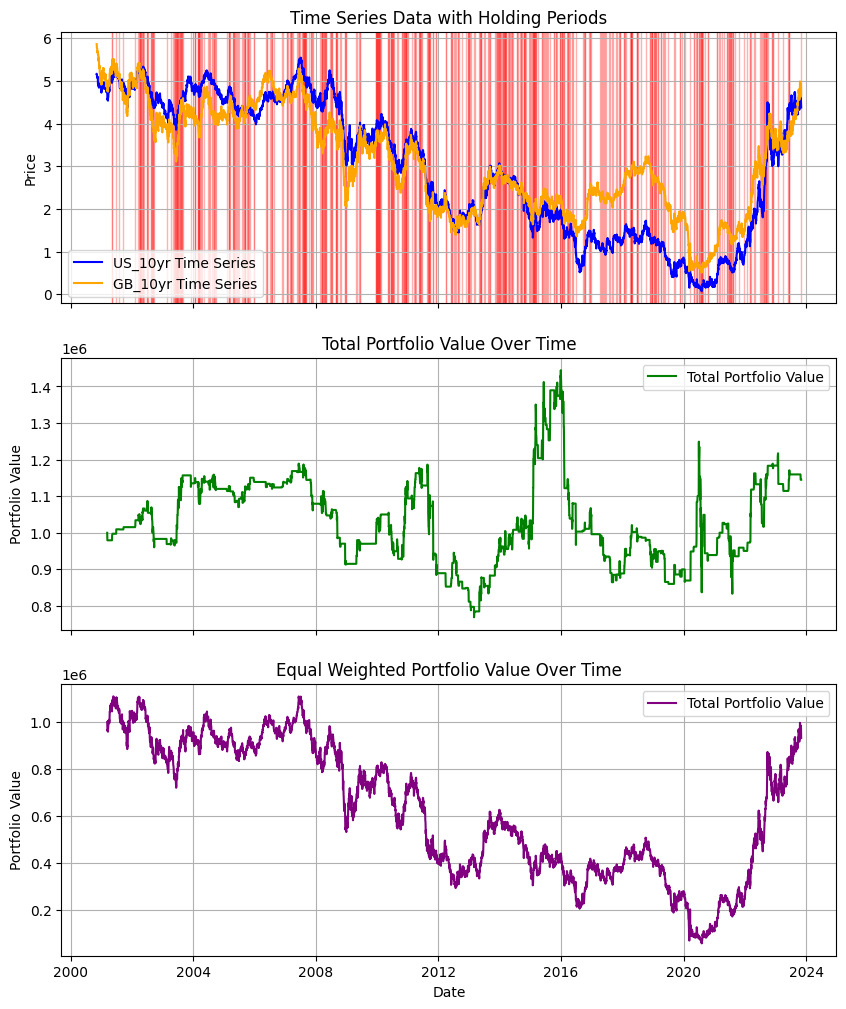

In [10]:
strategy.plot_time_series_and_portfolio()

0.004085227224692463
0.004085227224692463
0.2768997266795783
0.3893286395332257
0.6480302307492515
0.7636317277462663
0.5367409625287416
0.5339355834936615
0.7106063519520975
0.615063951582003
0.547564513648234
0.552049394776781
0.5549120979363863
0.4095872049591031
0.3581964009818016
0.24942206800618566
0.20336673657490723
0.24558002225392928
0.18285819030539813
0.0989089573764873
0.021124639336939442
0.03721756430684619
0.027787043934180834
0.024977924192794047
0.03435404469093889
0.015721032099833547
0.01508536984111417
0.026570565233887757
0.013823542683144965
0.010579456630338189
0.01251138404841307
0.019524175598554037
0.00851945396612415
0.004566455217535502
0.002552013856646917
0.0017683036122353596
0.002125332410550308
0.002722977943248486
0.0034082155465747074
0.0026774914584849468
0.0027264042436474355
0.00221764142610261
0.0008970155042311376
0.015178914229180966
0.03969302493623191
0.01964949625565546
0.024929679288526595
0.05582873903114725
0.04191289010483906
0.025534552

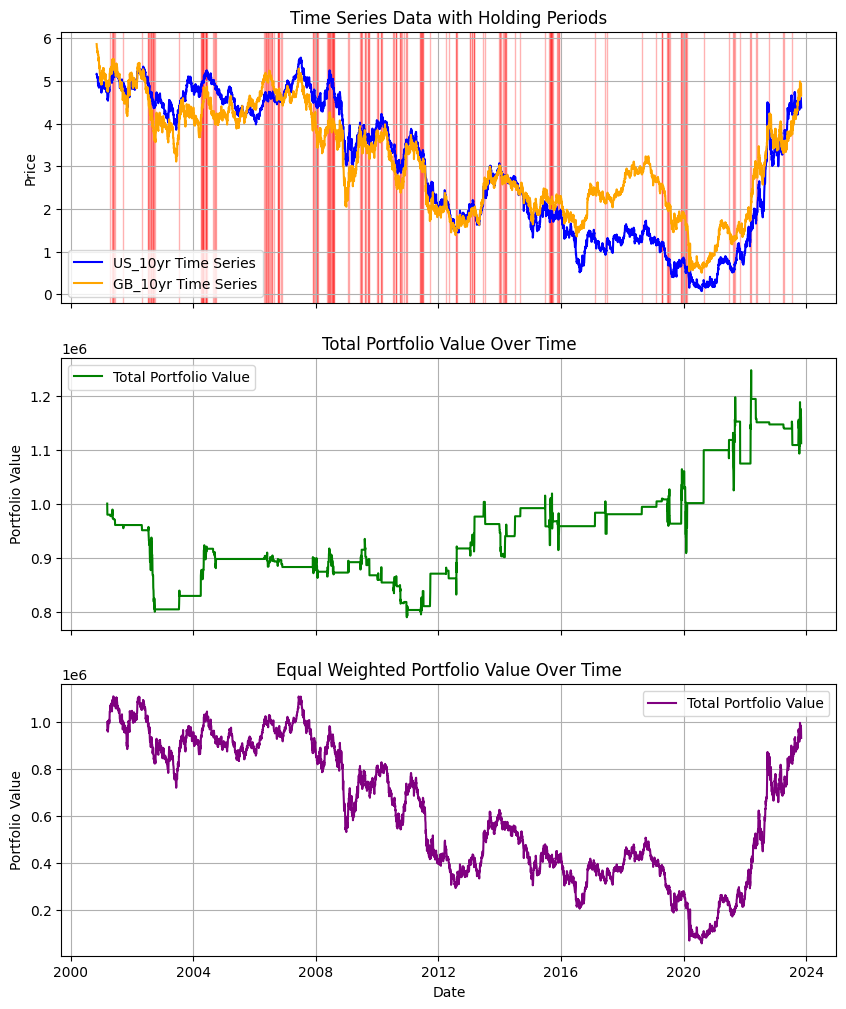

In [11]:
strategy :PairTradingTest = PairTradingTest(data,90,1)
strategy.__backtest__()
strategy.plot_time_series_and_portfolio()

In [12]:
# indicies
series = {"PanEuroAggIdx_2000.csv": "PanEuroIdx", "JPY_10yr_2000.csv": "JPY_10yr"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

            PanEuroIdx  JPY_10yr
Date                            
2000-11-07       1.815  104.9184
2000-11-08       1.810  104.8983
2000-11-09       1.800  104.9480
2000-11-10       1.804  105.0228
2000-11-13       1.776  105.3412
2000-11-14       1.782  105.2628
2000-11-15       1.780  105.2965
2000-11-21       1.704  105.5359
2000-11-22       1.710  105.8350
2000-11-24       1.673  105.8363
2000-11-27       1.683  105.9237
2000-11-28       1.703  106.0469
2000-11-29       1.670  106.0182
2000-11-30       1.615  106.0956
2000-12-01       1.629  106.2325
2000-12-04       1.639  106.4320
2000-12-05       1.599  106.4390
2000-12-06       1.623  106.5262
2000-12-07       1.563  106.4982
2000-12-08       1.589  106.4948
2000-12-11       1.635  106.7226
2000-12-12       1.640  106.6656
2000-12-13       1.689  106.9789
2000-12-14       1.654  107.0914
2000-12-15       1.640  107.1796
2000-12-18       1.682  107.2872
2000-12-19       1.645  107.1088
2000-12-20       1.576  107.0988
2000-12-21

(-2.875118680627169,
 0.14294930080257934,
 array([-3.89834602, -3.33719302, -3.04518781]))

In [14]:
import quantstats as qs

print(qs.stats.sharpe(strategy.portfolio.sum(axis=1)))

print(strategy.portfolio.sum(axis=1).corr(data.data.iloc[:,0]))
print(strategy.portfolio.sum(axis=1).corr(data.data.iloc[:,1]))
print(strategy.portfolio.sum(axis=1).corr(strategy.ew_portfolio.sum(axis=1)))

0.09538085936275845
-0.4837650168574291
-0.3464633606171392
-0.432938211984731


In [ ]:
#idx_data.data = idx_data.data.iloc[:1000]
strategy :PairTradingTest = PairTradingTest(idx_data,30,1)
strategy.__backtest__()
strategy.plot_time_series_and_portfolio()

**How did the portfolio go negative?**

In [ ]:
# try some other combinations

# How is there no cointegration between the US bond and US Index
series = {"USAggIdx_2000.csv": "US_15Min", "US_10yr_2000.csv": "GB_15Min"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

In [ ]:
series = {"PanEuroAggIdx_2000.csv": "PanEuro_10yr", "US_10yr_2000.csv": "US_10yr"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

In [ ]:
strategy :PairTradingTest = PairTradingTest(idx_data,30,1)
strategy.__backtest__()

In [ ]:
strategy.plot_time_series_and_portfolio()

In [ ]:
print(coint(strategy.portfolio.sum(axis=1), strategy.ew_portfolio.sum(axis=1)))
print(strategy.portfolio.sum(axis=1).corr(strategy.ew_portfolio.sum(axis=1)))
print(strategy.portfolio.sum(axis=1).corr(strategy.data.data.iloc[:,0]))
print(strategy.portfolio.sum(axis=1).corr(strategy.data.data.iloc[:,1]))

In [ ]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [ ]:
qs.stats.sharpe(strategy.portfolio.sum(axis=1))

In [ ]:
qs.plots.snapshot(strategy.portfolio.sum(axis=1))

In [ ]:
qs.reports.full(strategy.portfolio.sum(axis=1), benchmark=strategy.ew_portfolio.sum(axis=1))